# Workgroup 4

# 1. Orthogonal Learning

# Simulation Design 1

B = 50 , B = 100, B = 1000
$$ Y = 5D + betaX + rnorm(n) $$

In [36]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

## 1.1 B=50

In [3]:
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [4]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]
    
    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

        

In [5]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive-True')

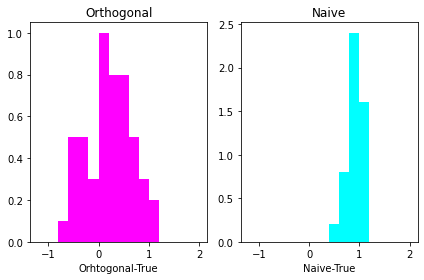

In [6]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="Magenta" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="Cyan")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal-True' )
axs[1].set_xlabel( 'Naive-True' )

## 1.2 B=100

In [4]:
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [ ]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [9]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive-True')

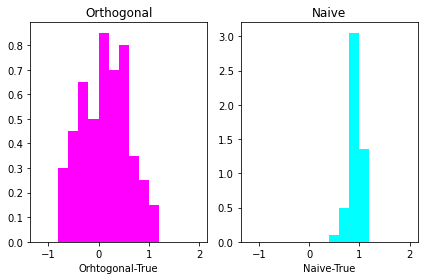

In [14]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="Magenta" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="Cyan")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal-True' )
axs[1].set_xlabel( 'Naive-True' )

## 1.3 B=1000

In [37]:
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [ ]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [ ]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

In [ ]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="Magenta" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="Cyan")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal-True' )
axs[1].set_xlabel( 'Naive-True' )

* Explication of the graphs: The histograms seem to be in accordance with the proposed equation: $ Y = 5D + \beta X + \varepsilon ; \varepsilon \xrightarrow[]{dist} Normal$, since the values of X, range and errors are small compared to the multiplier 5 that presents the variable D; also as these are randomly chosen numbers; that is, without a tendency to growth or decrease but tend to a number or interval of numbers around the multiplier 5 such regardless of the number of repetitions of the exercise.

# 2. Double Lasso - Testing the Convergence Hypothesis

## 2.1 Double Lasso

* Whats is Double Lasso Approach??

Unlike using a simple OLS, the double Lasso is a matching learning tool, the equation that represents this tool is that of minimization of errors plus a penalty factor, which turns out to be a process of minimization of deviations.

$$ \sum (Y_i-b'X_i)^2+\lambda \sum \left | b_i \right | $$ 

The addition containing lamda in the equation represents the penalty of this process; that is, force some covariates to disappear so that the effect of the other variables on the endogenous variable is cleaner: "remove noise from the regression".

## 2.2 Replicate model

## Data analysis

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [3]:
# Data that the author used
growth_read = pyreadr.read_r("../../data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

In [4]:
growth.shape

(90, 63)

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

In [5]:
# import statistical model packages (ols, lasso, etc)
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
# Create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', axis = 1)

## 2.2.1 OLS

In [7]:
# OLS regression
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Sat, 07 May 2022   Prob (F-statistic):           0.000200
Time:                        17:12:30   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

In [8]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

### Simulation results

In [9]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])

In [10]:
table_1_pandas.index = [ "OLS" ]

In [11]:
table_1_pandas.index = [ "OLS" ]
table_1_html = table_1_pandas.to_html()
table_1_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS</th>\n      <td>-0.009378</td>\n      <td>0.029888</td>\n      <td>-0.0706</td>\n      <td>0.051844</td>\n    </tr>\n  </tbody>\n</table>'

## 2.2.2 Using Sklearn

In [12]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], axis =  1 )
D = growth['gdpsh465']

In [13]:
from sklearn import linear_model

In [14]:
# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y - lasso_model.fit( W, Y ).predict( W )
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D - lasso_model.fit( W, D ).predict( W )
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005828894477391114, tolerance: 2.343497697571603e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Carol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.997244700077635, tolerance: 0.007147912790119585
  model = cd_fast.enet_coordinate_descent(


In [15]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via partialling-out using lasso {partial_lasso_est}" )

Coefficient for D via partialling-out using lasso -0.04774655653302119


In [16]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

### Summary LASSO results

In [17]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso  
table_2[0,1] = std_lasso   
table_2[0,2] = lower_ci_lasso
table_2[0,3] = upper_ci_lasso    


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "LASSO_S" ]
table_2_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_S,-0.047747,0.017705,-0.082926,-0.012567


In [18]:
table_3 = table_1_pandas.append(table_2_pandas)
table_3

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO_S,-0.047747,0.017705,-0.082926,-0.012567


In [19]:
table_3_html = table_3.to_html()
print(table_3_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO_S</th>
      <td>-0.047747</td>
      <td>0.017705</td>
      <td>-0.082926</td>
      <td>-0.012567</td>
    </tr>
  </tbody>
</table>


The least square method provides a rather noisy estimate of the speed of convergence. We can not answer the question if poor countries grow faster than rich countries. The least square method does not work when the ratio $p/n$ is large.

In sharp contrast, partialling-out via Lasso provides a more precise estimate. The Lasso based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.8\%,-2.2\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO</th>
      <td>-0.047747</td>
      <td>0.017705</td>
      <td>-0.082926</td>
      <td>-0.012567</td>
    </tr>
  </tbody>
</table>

## 2.2.3 HDMPY

In [20]:
res_Y = hdmpy.rlasso( W, Y).est['residuals']   # By default Post lasso 
res_D = hdmpy.rlasso( W, D ).est['residuals'] # By default Post lasso 

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [21]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())



                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Sat, 07 May 2022   Prob (F-statistic):                    0.000533
Time:                        17:25:04   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [23]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso   
table_4[0,1] = std_lasso    
table_4[0,2] = lower_ci_lasso 
table_4[0,3] = upper_ci_lasso     


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO_HDMY" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_HDMY,-0.049811,0.013858,-0.077347,-0.022276


In [24]:
table_5 = table_3.append(table_4_pandas)
table_5

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO_S,-0.047747,0.017705,-0.082926,-0.012567
LASSO_HDMY,-0.049811,0.013858,-0.077347,-0.022276


# 2.2.4 HDMPY Direct

In [25]:
# Datadframe 

Y = growth[['Outcome']]
D = growth[['gdpsh465']]

In [26]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")  
lasso_direct

{'alpha': -0.049811444837338376,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.049811444837338376,
 'coefficient': -0.049811444837338376,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
  

In [27]:
lasso_direct['alpha']

-0.049811444837338376

In [29]:
est_lasso_hdm = lasso_direct['alpha']
std_lasso_hdm = lasso_direct["se"]
lower_ci_lasso_hdm = est_lasso - 1.96*std_lasso
upper_ci_lasso_hdm = est_lasso + 1.96*std_lasso

# t - critical value (DISTRIBUCIÓN NORMAL,  nivel de significancia del 5%)

In [31]:
table_6 = np.zeros( (1, 4) )

table_6[0,0] = est_lasso_hdm   
table_6[0,1] = std_lasso_hdm    
table_6[0,2] = lower_ci_lasso_hdm 
table_6[0,3] = upper_ci_lasso_hdm     


table_6_pandas = pd.DataFrame( table_6, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_6_pandas.index = [ "LASSO_PO" ]
table_6_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_PO,-0.049811,0.015391,-0.076973,-0.02265


In [ ]:
# Summary

In [32]:
table_7 = table_5.append(table_6_pandas)
table_7

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO_S,-0.047747,0.017705,-0.082926,-0.012567
LASSO_HDMY,-0.049811,0.013858,-0.077347,-0.022276
LASSO_PO,-0.049811,0.015391,-0.076973,-0.022650


In [33]:
data = table_7.reset_index()
errors = data['Estimator'] - data['lower bound CI']

In [34]:
data['errors'] = errors
data

,index,Estimator,Std. Error,lower bound CI,upper bound CI,errors
0,OLS,-0.009378,0.029888,-0.070600,0.051844,0.061222
1,LASSO_S,-0.047747,0.017705,-0.082926,-0.012567,0.035180
2,LASSO_HDMY,-0.049811,0.013858,-0.077347,-0.022276,0.027535
3,LASSO_PO,-0.049811,0.015391,-0.076973,-0.022650,0.027161


C:\Users\Carol\AppData\Local\Temp/ipykernel_7316/1587442480.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(data.shape[0]),


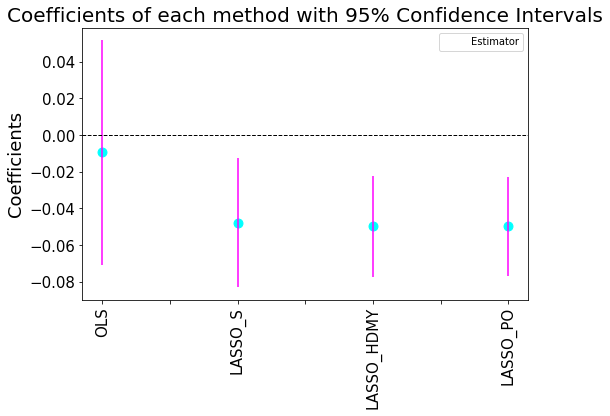

In [35]:
# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(8, 5))

data.plot(x='index', y='Estimator', kind='line',
            ax=ax, color='none', fontsize=15, 
            ecolor='Magenta',capsize=0,
            yerr='errors', legend=True)

plt.title('Coefficients of each method with 95% Confidence Intervals', fontsize=20)
ax.set_ylabel('Coefficients', fontsize=18)
ax.set_xlabel('',fontsize=22)
    
ax.scatter(x=pd.np.arange(data.shape[0]), 
         marker='o', s=80, 
         y=data['Estimator'], color='Cyan')
    

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.xticks(rotation=90)
plt.show()

# Neyman Orthogonality Proof

* Remember that one of the equations to estimate was this: $$ Y = \alpha D +\beta 'W + \epsilon $$

Punctually, you want to know the value of $\alpha$.Well for this, the estimation through the double lasso was used only if the ratio between observations and covariates was relatively large and to calculate the predicted errors, for example the predicted error of $D$ , as follows

follows
$$ \tilde{D} = D - \gamma' _{DW}W  $$


Analogously for  $ \tilde{Y} $

$$ \tilde{Y} = Y - \gamma' _{YW}W  $$

Where $ \gamma' _{DW}W $  is represented by a Lasso estimate: 

$$  \gamma' _{DW} = argMin \left \{ \sum \left ( D_i-\gamma 'W \right )^2 + \lambda _1\sum \hat{\varphi _i} \left | \gamma _j \right |\right \} $$

Analogously for  $ \gamma' _{YW}W $

$$  \gamma' _{DW} = argMin \left \{ \sum \left ( Y_i-\gamma 'W \right )^2 + \lambda _1\sum \hat{\varphi _i} \left | \gamma _j \right |\right \} $$

Now, it is known that after regressing the predicted errors $ \tilde{D}$ and $ \tilde{Y}$, the alpha $\breve{\alpha }$ value fulfills an important property: "alpha $\breve{\alpha }$ is insensitive to the first order of the local perturbations of the parameters that are close to the true value"

Expressed mathematically : 

$$ K = \frac{\partial{\alpha }}{\partial \eta } (\eta ^0) = 0  ... (1) $$ 

* And that equality will only be fulfilled if Neyman's orthogonality is present explained below
The following function form with arguments $a$ y $ \eta $ is proposed 

$$ M(a,\eta) = E \left [ \left ( \tilde{Y}(\eta _1)-a\tilde{D}(\eta _2)\right ) \tilde{D}(\eta _2)\right ] ... (2)$$

It is also assumed that in the optimal $a$ is equal to $\alpha$ and $\eta$ is known to represent an ordered pair; that is, it has two arguments $(\eta_1 ,\eta_2 )$ 

Also, to prove equation $(1)$, it is necessary to have a functional form of $\alpha$ in $\eta$. Also, to prove equation (1), it is necessary to have a functional form of $\alpha$ in $\eta$. To do this, the implicit function theorem is necessary because it meets the requirements to apply this theorem, since the functio $M = (\alpha ;\eta) $ is equal to zero for the following:

$$ \rightarrow \tilde{Y} = a\tilde{D} + \epsilon $$ $$ \rightarrow (\tilde{Y}-a\tilde{D}) = \epsilon ... (3) $$

(3) in (2): 

$$ M(a,\eta) = E \left [ \epsilon \tilde{D}(\eta _2)\right ] = 0 $$

This is because the expected error with the regressor is zero for the OLS orthogonality assumption.
Then the functional form of $\alpha$ in $\eta$ must be born from equation $(2)$ when $a$ is equal to $\alpha$. Specifically the next expression should be equal to zero

$$ T = {\partial \alpha } M(\alpha , \eta ^0)^{-1}{\partial \eta } M(\alpha , \eta ^0) = 0 $$

Specifically the expression $ {\partial \eta } M(\alpha , \eta ^0) $ is divided into two arguments, since $\eta ^{0} = (\eta _{1}, \eta _{2}) $. And this expression ${\partial \eta } M(\alpha , \eta ^0)$ is the one that must become zero, because this other ${\partial \alpha } M(\alpha , \eta ^0)^{-1}$ expression is elevated to $(-1)$, and the expression $ \frac{1}{0} $ is different from zero.
So, the expression to focus in is

 $$ {\partial \eta } M(\alpha , \eta ^0)  = \frac{\partial M }{\partial \eta_{1}}{\mathrm{d}\eta_{1}} + \frac{\partial M }{\partial \eta_{2}}{\mathrm{d}\eta_{2}} $$

Where $$ \frac{\partial M }{\partial \eta_{1}}{\mathrm{d}\eta_{1}} = E\left [ \frac{\partial \tilde{Y} (\eta_{1})}{\partial \eta_{1}} . \tilde{D} \right ]$$

and taking into account that $$\tilde{Y} = Y - \eta _{1}W$$

The expression would be $E\left [ W . \tilde{D} \right ]$ , and this would be zero for the following

$$ W.\tilde{D} = W (D-\eta _{2}W) ; \eta _{2} = (W'W)^{-1} (W'D) $$

$$ \rightarrow  W\tilde{D} = WD - W (W'W)^{-1}(W'D)W$$ 

$$ \rightarrow  W\tilde{D}=WD - W (W'W)^{-1}(W'W)D $$

$$ \rightarrow  W\tilde{D} = WD - WID $$

$$\rightarrow W\tilde{D} = WD - WD$$

$$ \rightarrow W\tilde{D} = 0 $$

The other adding

$$ \frac{\partial M }{\partial \eta_{2}}{\mathrm{d}\eta_{2}} = E\left [ \left ( -\alpha .\frac{\partial \tilde{D}(\eta _{2})}{\partial \eta _{2}} \right )\tilde{D} + \frac{\partial \tilde{D}(\eta _{2})}{\partial \eta _{2}} (\tilde{Y}-\alpha \tilde{D}) \right ] $$

Taking into account

$$ \tilde{D} = D - \eta_{2}W  $$

So, it would be summarized in

$$ \rightarrow \frac{\partial M }{\partial \eta_{2}} = E\left [ \left ( -\alpha  \right )W \tilde{D} + (-W)(\tilde{Y}-\alpha \tilde{D})\right ] $$ 

$$\rightarrow \frac{\partial M }{\partial \eta_{2}} = E(W\tilde{Y}) + 2 E(\alpha W\tilde{D})$$

By the Orthogonality property of the OLS 

$$\rightarrow \frac{\partial M }{\partial \eta_{2}} = E(0) + 2 E(\alpha 0)$$

$$ \rightarrow \frac{\partial M }{\partial \eta_{2}} = 0 $$

Since it has been shown to be equal to zero, it can be concluded that the expression $ K = \frac{\partial{\alpha }}{\partial \eta } (\eta ^0) $ is zero and the Neyman orthogonality property is present to support the contribution of the double Lassus on the return $\alpha$ mentioned above.